In [1]:
import numpy as np
import random
import pylab
import matplotlib as plt
from scipy import stats
from sklearn import datasets
from sklearn.datasets.samples_generator import make_regression 

In [2]:
make_blobs = datasets.make_blobs()

In [3]:
type(make_blobs)

tuple

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, centers=2, n_features=2,
                  random_state=0)
print(X.shape)

(100, 2)


In [5]:
print(X[:5])

[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]


In [6]:
print(y[:15])

[1 1 0 0 1 0 0 1 0 1 0 1 0 0 1]


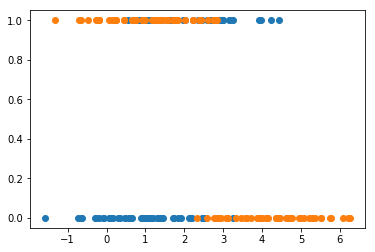

In [7]:
pylab.plot(X, y, 'o')
pylab.show()

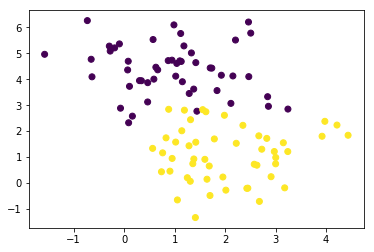

In [8]:
# строим каждую точку с координатами ее признаков и красим в цвет класса. 0 будет одним цветом, а 1 - другим.
plt.pyplot.scatter(X[:, 0], X[:, 1], c= y) #x= пертвый признак (с индексом 0) из датасета, y= второй признак (с индексом 1) из датасета, с = цвет класса 


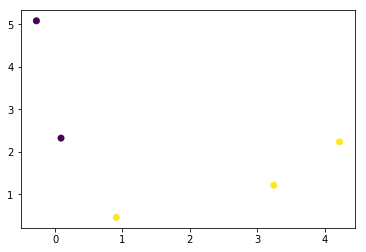

In [10]:
# построим первые 5 точек, чтобы сравнить с координатами 
plt.pyplot.scatter(X[:5, 0], X[:5, 1], c= y[:5])

In [11]:
# размерность данных - матрица из 100 строк и 2 стробов
m, n = np.shape(X)
m, n

(100, 2)

In [12]:
# покажем первые 5 записей - Амассив из координат выводится в квадратных скобках, потому что это двумерный массив
X[:5]

array([[ 4.21850347,  2.23419161],
       [ 0.90779887,  0.45984362],
       [-0.27652528,  5.08127768],
       [ 0.08848433,  2.32299086],
       [ 3.24329731,  1.21460627]])

In [13]:
# y лист значений
y[:5]

array([1, 1, 0, 0, 1])

### Модель логистиечкой регрессии

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [16]:
modellogit = LogisticRegression() # accuracy_score сработала, строчку ниже можно проигнорировать
modellogit.fit( X, y )
y_Logit_model = modellogit.predict(X)
print("LR Accuracy :", accuracy_score(y, y_Logit_model))

LR Accuracy : 0.92


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
modellogit.intercept_, modellogit.coef_

(array([2.33094357]), array([[ 0.97342214, -1.52164052]]))

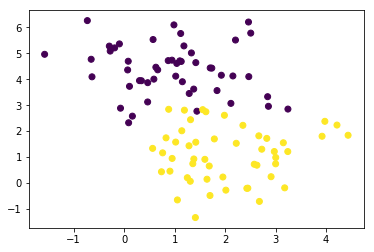

In [21]:
plt.pyplot.scatter(X[:, 0], X[:, 1], c = y)

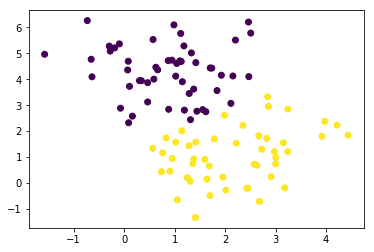

In [22]:
plt.pyplot.scatter(X[:, 0], X[:, 1], c = y_Logit_model)

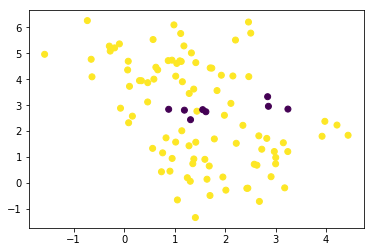

In [20]:
plt.pyplot.scatter(X[:, 0], X[:, 1], c = (y == y_Logit_model)) #как лучше построить два графика на одной картинке, чтобы было видно разницу между модельными y и реальными:
# можно либо построить 2 отдельных графика
# Либо построить один график, но в качестве меток цветов передать признак
# совпало ли предсказание или нет (c = (y  == y_pred)), где y_pred - предсказание модели


### Модель линейной классификации

In [23]:
from sklearn.svm import SVC

In [24]:
modelSVC = SVC(kernel='linear') 
modelSVC.fit(X, y)
y_SVC_model = modelSVC.predict(X)
print("SVC Accuracy :", accuracy_score(y, y_SVC_model))

SVC Accuracy : 0.95


In [25]:
modelSVC.intercept_, modelSVC.coef_

(array([4.41619221]), array([[ 0.23432873, -1.8285024 ]]))

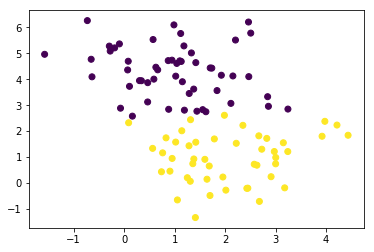

In [36]:
plt.pyplot.scatter(X[:, 0], X[:, 1], c=y_SVC_model)
# как нарисовать разделение и сравнить что получилось с разделяющими линиями в двух методах:
# проще всего  это сделать по аналогии с занятием, когда мы рисовали decision boundary.
# Посмотреть примеры, где рисовались цветные графики, например в ноутбуке с деревом

### теперь проверка вручную: необходимо минимизировать логлосс = кроссэнтропия для задачи логистической регрессии
### модель логистической регрессии: в коэффициентах и признаках содержится вероятность принадлежности определенному классу (0-му или 1-му)

In [26]:
# шаг алгоритма
alpha = 0.01

In [27]:
import math

In [29]:
m, n = np.shape(X)
m, n

(100, 2)

In [43]:
X = np.c_[ np.ones(m), X] # мы тут прибавили единичку везде к форме записи как свободный член
X[:10]

array([[ 1.        ,  4.21850347,  2.23419161],
       [ 1.        ,  0.90779887,  0.45984362],
       [ 1.        , -0.27652528,  5.08127768],
       [ 1.        ,  0.08848433,  2.32299086],
       [ 1.        ,  3.24329731,  1.21460627],
       [ 1.        ,  1.44193252,  2.76754364],
       [ 1.        ,  1.0220286 ,  4.11660348],
       [ 1.        ,  3.97820955,  2.37817845],
       [ 1.        ,  0.58894326,  4.00148458],
       [ 1.        ,  1.25185786,  0.20811388]])

In [45]:
m = X.shape[0]
m

100

In [34]:
theta = np.ones(3) # для задачи начальное приближение берем как три единички, т.к. у нас два признака и свободный член
theta2= theta.transpose()
print("theta=", theta)
print("theta2=", theta2)  # Алексей, почему не вывелся транспонированный массив?

theta= [1. 1. 1.]
theta2= [1. 1. 1.]


In [ ]:
# логистическая регрессия - это сигмойда от theta_0 + theta_1 * x1 + theta_2 * x2

In [47]:
def gradient_descent(alpha, X, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь для энтропии в случае с логистической регрессией
    """
    
    m = X.shape[0] # 100 хотим узнать, сколько элементов
    theta = np.ones(3) # [ 1.  1. 1.] ВЕСА МОДЕЛИ!!! начальное приближение, берем три единики Алексей, почему не транспонируем начальное приближение? дальше напрашивается в формулы
    # веса модели - строка из трех едниц (1х3). а потом мы ее умножаем на транспонированный Х (3х100)
    x_transpose = X.transpose() # транспонированная матрица X размерность была (100х3) ->3x100 Алексей, так?
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(X, theta) # матричное произведение (100х3)*(1х3) Алексей, по правилам умножения матриц спросила в слаке, матрица какой размерности получится в итоге этого действа?
        
        loss = hypothesis - y # Алексей, гипотеза и y должны быть одинаковых размерностей? y (100х1) гипотеза какой размерности?
        J = np.sum(-y* (math.log(hypothesis)-((1-y)* (math.log(1-hypothesis)))) 
                   
#         print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m    x_transpose размера (100х3) * loss размера какого, Алексей? какой размерности будет градиент?
        theta = theta - alpha * gradient  # update на этом шаге происходит корректировка лосса
    
    return theta

SyntaxError: invalid syntax (<ipython-input-47-be6a11e8e7b5>, line 20)

GRADIENT = (X_T * веса) / количество_данных

1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4

1 1 1 1 1 1 1 1 1 1 1 1    0.4
2 2 2 2 2 2 2 2 2 2 2 2    0.334
3 3 3 3 3 3 3 3 3 3 3 3    0.34
4 4 4 4 4 4 4 4 4 4 4 4    0.23


In [48]:
%%timename
theta = gradient_descent(alpha, X, y, 1000) # Алкексей, при прогоне выдается ошибка name 'gradient_descent' is not defined

NameError: name 'gradient_descent' is not defined

In [55]:
# Алексей, что в этой части кода должно быть? где у меня ошибки? 
#построим полученный y_predict 
# здесь нужно выписать формулу сигмоиды от тета, результат надо сравнить с 0.5 и если он больше 0.5 - вернуть 1 (первый класс), если меньше - 0 (нулевой класс)
for i in range(X.shape[2]):
    rez = 1/(1+ np.exp(-(theta[0] + theta[1]*X[0]+ theta[2]*X[1]))
             if rez < 0.5: 
                 y_predict[i] = 0 
             else: 
                 y_predict[i] = 1 
             
return y_predict
  

SyntaxError: invalid syntax (<ipython-input-55-48b3b7b8f3b1>, line 6)

In [50]:
  plt.pyplot.scatter(X[:, 0], X[:, 1], c=y_predict)

NameError: name 'y_predict' is not defined